# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [2]:
def f(r):
    x, y = r
    f = (1-x)**2+100*(y-x**2)**2
    return f
    
    
def grad(r):
    x, y = r
    fx = 2*(-200*y*x+200*x**3+x-1)
    fy = 200*(y-x**2)
    return [fx,fy]


Before proceeding, ensure that your functions have been written correctly:

In [3]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [4]:
def gradientDescent(df, r0, eta, nstep):
    history = numpy.empty( (nstep+1, 2) )
    history[0] = r0
    for i in range (0,nstep):
        history[i+1][0] = history[i,0]-eta*df(history[i])[0]
        history[i+1][1] = history[i,1]-eta*df(history[i])[1]    
    return history

Test your answer:

In [5]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

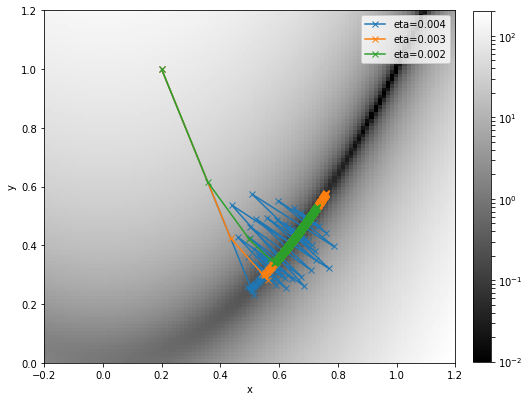

In [11]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point
xval1 = []
yval1 = []
N = 300
for i in range (N):
    x = gradientDescent(grad,r0,0.004,N)[i][0]
    xval1.append(x)
for i in range (N):
    y = gradientDescent(grad,r0,0.004,N)[i][1]
    yval1.append(y)
xval2 = []
yval2 = []
for i in range (N):
    x = gradientDescent(grad,r0,0.003,N)[i][0]
    xval2.append(x)
for i in range (N):
    y = gradientDescent(grad,r0,0.003,N)[i][1]
    yval2.append(y)
xval3 = []
yval3 = []
for i in range (N):
    x = gradientDescent(grad,r0,0.002,N)[i][0]
    xval3.append(x)
for i in range (N):
    y = gradientDescent(grad,r0,0.002,N)[i][1]
    yval3.append(y)
    
plt.plot(xval1,yval1,marker='x',label='eta=0.004')
plt.plot(xval2,yval2,marker='x',label='eta=0.003')
plt.plot(xval3,yval3,marker='x',label='eta=0.002')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

The best step size appears to be 0.003 as this makes it the furthest way along the dark curve towards the minimum in the same amount of steps. The value of 0.004 appears to be too large and has a period of occilating too far away from the central curve. The value of 0.002 appears to be too small as it takes more steps than the 0.003 value to reach the same point.